In [17]:
%matplotlib inline
# Importowanie potrzebnych bibliotek
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from math import pi

provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-08-28 16:41:09,785: Credentials are already in use. The existing account in the session will be replaced.


In [18]:
# wybór symulatora kwantowego
backend = Aer.get_backend('qasm_simulator')
n=1 # liczba rejestrów
seria=2048 # liczba pomiarów

In [19]:
#Zdefiniowanie zmiennych oraz kątów
A1 = 196
A2 = 244
A3 = 393
A4 = 394
k1 = (A1 + A2 + A3 + A4) % 2
k2 = (A1 + A2 + A3 + A4) % (2 ** 2)
k3 = (A1 + A2 + A3 + A4) % (2 ** 3)
theta0 = 0 if k2 == 0 else pi / k2
phi0 = 0 if k3 == 0 else 2 * pi / k3

#Implementacja operacji (2.2)
def operation(circuit,qubit,k,phi,theta):
    if k == 1:
        circuit.x(qubit[0])
    circuit.u3(theta,0,0,qubit[0])
    circuit.u1(phi,qubit[0])

In [20]:
#Pomiar typu Z (2.3)
nz = 1  # Liczba kubitów i bitów
qz = QuantumRegister(nz) # Rejestr kwantowy
cz = ClassicalRegister(nz) # Rejestr klasyczny
circuitZ = QuantumCircuit(qz, cz) # Algorytm kwantowy - kwantowy obwód
operation(circuitZ,qz,k1,phi0,theta0)
circuitZ.measure(qz[0], cz[0]) # Sprawdzenie stanów kubitów - kwantowy pomiar typu Z

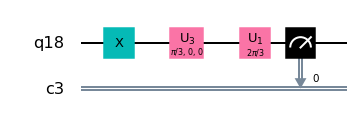

In [21]:
circuitZ.draw(output='mpl')

In [22]:
#Pomiar typu X (2.3)
nx =n  # Liczba kubitów i bitów
qx = QuantumRegister(nx) # Rejestr kwantowy
cx = ClassicalRegister(nx) # Rejestr klasyczny
circuitX = QuantumCircuit(qx, cx) # Algorytm kwantowy - kwantowy obwód
operation(circuitX,qx,k1,phi0,theta0)
circuitX.h(qx[0])
circuitX.measure(qx[0], cx[0]) # Sprawdzenie stanów kubitów - kwantowy pomiar

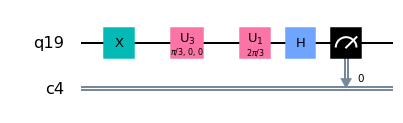

In [23]:
circuitX.draw(output='mpl')

In [24]:
#Pomiar typu Y (2.3)
ny = n  # Liczba kubitów i bitów
qy = QuantumRegister(ny) # Rejestr kwantowy
cy = ClassicalRegister(ny) # Rejestr klasyczny
circuitY = QuantumCircuit(qy, cy) # Algorytm kwantowy - kwantowy obwód
operation(circuitY,qy,k1,phi0,theta0)
circuitY.sdg(qy[0]) # Operacja X realizowana na kubicie qy[0]
circuitY.h(qy[0]) # Operacja X realizowana na kubicie qy[0]
circuitY.measure(qy[0], cy[0]) # Sprawdzenie stanów kubitów - kwantowy pomiar

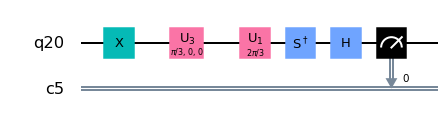

In [25]:
circuitY.draw(output='mpl')

In [26]:
# Obliczenia kwantowe - pomiar typu Z (2.4)
job_simZ = execute(circuitZ, backend, shots=seria)
sim_resultZ = job_simZ.result()
# Liczbowa prezentacja wyników
print(sim_resultZ.get_counts(circuitZ))

{'0': 519, '1': 1529}


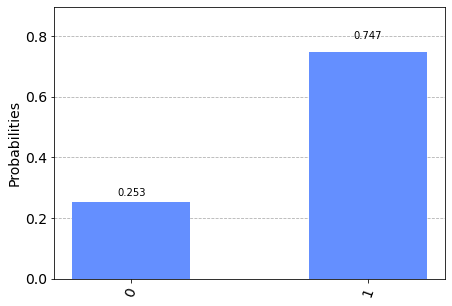

In [27]:
# Graficzna prezentacja wyników - pomiar typu Z (2.3)
plot_histogram(sim_resultZ.get_counts(circuitZ))

In [28]:
# Wykonanie obliczeń kwantowych - pomiar typu X (2.4)
job_simX = execute(circuitX, backend, shots=seria)
sim_resultX = job_simX.result()
# Liczbowa prezentacja wyników wyników pomiaru typu X
print(sim_resultX.get_counts(circuitX))

{'0': 1466, '1': 582}


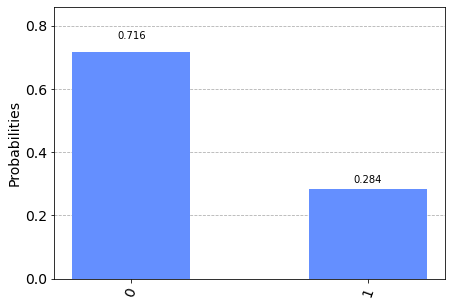

In [29]:
# Graficzna prezentacja wyników - pomiar typu X (2.4)
plot_histogram(sim_resultX.get_counts(circuitX))

In [30]:
# Wykonanie obliczeń kwantowych - pomiar typu Y (2.4)
job_simY = execute(circuitY, backend, shots=seria)
sim_resultY = job_simY.result()
# Liczbowa prezentacja wyników pomoaru typu Y
print(sim_resultY.get_counts(circuitY))

{'0': 263, '1': 1785}


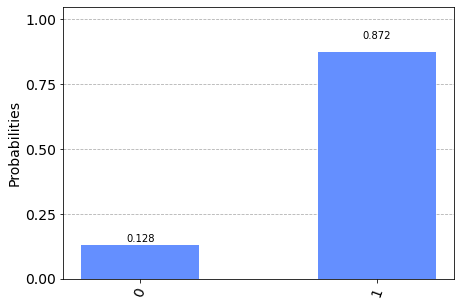

In [31]:
# Graficzna prezentacja wyników - pomiar typu Y (2.4)
plot_histogram(sim_resultY.get_counts(circuitY))